In [56]:
# import the relevant modules
__author__='Xia Wang'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import zipfile
import geopandas as gpd
import urllib
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import matplotlib.patches as mpatches
import palettable

url = "https://raw.githubusercontent.com/Elixeus/PUI2015_xwang/master/plotstyle.json"
response = urllib.urlopen(url)
s = json.loads(response.read())
plt.rcParams.update(s)

import sklearn.cluster
%matplotlib inline

In [2]:
# create all the file names
fnames = {}
for i in range(0,10):
    fnames[i] = os.getenv('PUI')+'HW10/zbp0%itotals.zip' %i
for j in range(10, 14):
    fnames[j] = os.getenv('PUI')+'HW10/zbp%itotals.zip' %j
for k in range(94,100):
    fnames[k] = os.getenv('PUI')+'HW10/zbp%itotals.zip' %k

In [3]:
# names of txt files within the zipped files
tnames = {}
for i in range(0,10):
    tnames[i] = 'zbp0%itotals.zip' %i
for j in range(10, 14):
    tnames[j] = 'zbp%itotals.zip' %j
for k in range(94,100):
    tnames[k] = 'zbp%itotals.zip' %k

In [4]:
# read all the files
df = {}
for i in fnames:
    df[i] = pd.read_csv(zipfile.ZipFile(fnames[i]).open(tnames[i].replace('.zip','.txt')))

In [5]:
df[94][df[94]['zip'] == 11372]

,zip,name,empflag,emp,qp1,ap,est
3397,11372,"Flushing, NY",NaN,5666,26794,119778,1229


## clean the data, change the upper to lower case

In [6]:
df[98]['zip'] = df[98]['ZIP']
df[98]['est'] = df[98]['EST']

In [7]:
df[99]['zip'] = df[99]['ZIP']
df[99]['est'] = df[99]['EST']

In [8]:
df[0]['zip'] = df[0]['ZIP']
df[0]['est'] = df[0]['EST']

In [9]:
df[1]['zip'] = df[1]['ZIP']
df[1]['est'] = df[1]['EST']

In [10]:
df[2]['zip'] = df[2]['ZIP']
df[2]['est'] = df[2]['EST']

In [11]:
# read the geodata
geodata = gpd.read_file(os.getenv('PUI')+'HW10/nyc-zip-code-tabulation-areas-polygons.geojson')

## Use the geodatafile to select NYC zipcodes

In [12]:
geodata['zip'] = geodata['postalCode'].astype(float)
zips = sorted(geodata.zip.unique())

In [13]:
zips = pd.DataFrame(zips)
zips.columns = ['zip']
zips = zips.astype(float)

In [14]:
#geodata.ix[0,'zip']

In [15]:
data = {}
for i in df:
    data[i] = df[i][['zip', 'est']]
    data[i]['zip'].astype(str)

In [16]:
data[94][data[94]['zip'] == 11372]

,zip,est
3397,11372,1229


In [17]:
dic = {}
for i in data:
    dic[i] = pd.merge(data[i], zips, on = 'zip')

In [18]:
dic[94].shape

(240, 2)

In [19]:
for i in dic:
    dic[i] = dic[i][['zip', 'est']]
    dic[i]['zip'] = dic[i]['zip'].astype(str)
    dic[i]['est'] = dic[i]['est'].astype(int)

In [20]:
len(dic[97]['zip'].unique())

238

In [21]:
dic[94][:10]

,zip,est
0,10001,6999
1,10002,1784
2,10003,3256
3,10004,1115
4,10005,1076
5,10006,1061
6,10007,1307
7,10009,634
8,10010,3019
9,10011,3301


In [22]:
x = 0
y = 0

In [23]:
# sanity check
for i in dic:
    if len(dic[i]['zip']) == 242:
        print i

7


## Put all the years and est num into one big table, change the column names and sort the columns

In [24]:
y = [dic[i]['est'] for i in dic]
x = pd.concat(y, axis = 1)
x.columns = [i for i in dic]

In [25]:
x.index = dic[7]['zip'].astype(str)

In [26]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,96,99,97,98,94,95
zip,,,,,,,,,,,,,,,,,,,,
10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273,7075,7233,7154,7254,6999,7088
10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988,1919,2085,2049,2003,1784,1819
10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277,3417,3659,3535,3649,3256,3377
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479,1133,1233,1173,1176,1115,1124
10005,1287,1249,1244,1200,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296,1216,1242,1227,1270,1076,1109


In [27]:
# change column names
x.columns = ['2000', '2001', '2002', '2003', '2004', 
             '2005', '2006', '2007', '2008', '2009',
             '2010', '2011', '2012', '2013', '1996',
             '1999', '1997', '1998', '1994', '1995']

In [28]:
# change index order
x.sort_index(axis=1, inplace = True)

In [29]:
# drop the nans
x.dropna(inplace = True)

In [30]:
x.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
zip,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296


## Normalize the table according to the year

In [31]:
t = x.T
v = t

In [32]:
# check the algorithm
#(v['10001'] - v['10001'].mean())/v['10001'].std()

In [33]:
for i in t.columns:
    v[i] = (t[i] - t[i].mean())/t[i].std()

In [34]:
#(dataClean['10001'] - dataClean['10001'].mean())/dataClean['10001'].std()

In [35]:
dataClean = v

## Visualize whole the time series (k-means clustering)

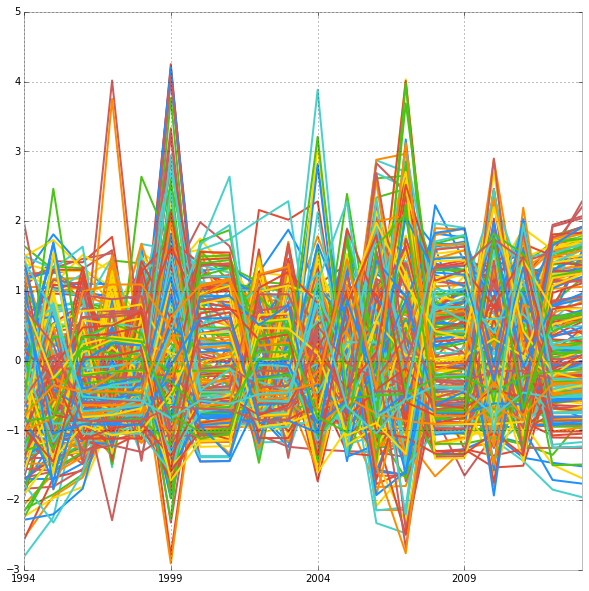

In [36]:
dataClean.plot(figsize = (10,10), legend = False)

## Make the Clustering happen! Let python do the heavy lifting!

In [112]:
# play around with the number of clusters and then according to the visualization, show the results
# remember to seed the clustering result
np.random.seed(120)
num_cluster = 7
results = sklearn.cluster.k_means(dataClean.T, n_clusters = num_cluster)

In [113]:
# prepare the table
data_n = dataClean.T
data_n['cluster'] = results[1]

In [114]:
x['cluster'] = data_n['cluster']

In [115]:
avg = x.groupby('cluster').mean()

In [116]:
avg

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
cluster,,,,,,,,,,,,,,,,,,,,
0,900.527778,496.944444,418.805556,472.000000,431.722222,554.888889,501.333333,508.555556,503.027778,482.027778,594.111111,1034.500000,798.194444,701.388889,1344.583333,1365.361111,848.777778,1434.777778,609.944444,629.694444
1,500.581395,761.116279,667.860465,1034.162791,637.046512,517.604651,516.860465,515.581395,1036.023256,682.000000,1087.302326,503.372093,494.255814,519.930233,542.093023,549.558140,556.023256,641.000000,1293.651163,1325.720930
2,488.303030,388.242424,502.606061,511.606061,509.757576,459.969697,456.757576,463.151515,549.090909,556.727273,457.878788,420.242424,1172.303030,923.303030,405.333333,415.545455,1158.636364,441.757576,694.484848,716.636364
3,579.451613,520.129032,683.870968,464.290323,834.580645,441.806452,982.129032,986.870968,628.258065,904.354839,483.806452,906.612903,578.000000,647.967742,800.838710,807.225806,688.677419,723.483871,538.000000,546.161290
4,232.827586,336.137931,258.896552,203.931034,255.068966,837.379310,284.344828,287.068966,202.689655,271.103448,370.241379,323.689655,299.448276,564.586207,309.965517,315.206897,306.103448,335.344828,230.793103,236.896552
5,1239.771429,1258.142857,1279.971429,1349.228571,1340.257143,1374.514286,1366.857143,1365.314286,1414.371429,1407.657143,1457.914286,1473.371429,1468.600000,1573.742857,1523.085714,1522.085714,1517.914286,1552.371429,1581.971429,1603.942857
6,1630.448276,1939.000000,1996.000000,1744.620690,2049.965517,1984.344828,2145.551724,2125.448276,1718.758621,1989.275862,1800.965517,1751.758621,1605.965517,1555.137931,1528.620690,1506.724138,1530.137931,1497.965517,1678.862069,1688.241379


## Visualize the clustering results

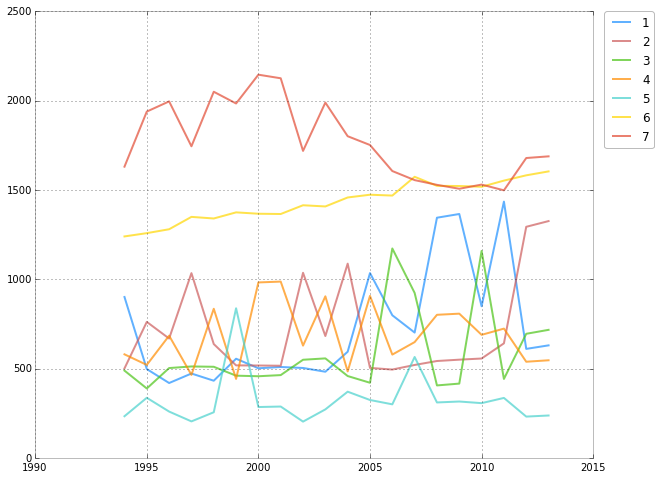

In [117]:
# draw the centroid lines
plt.figure(figsize = (10,8))
for i in avg.index:
    plt.plot(avg.columns, avg.ix[i,:], alpha = 0.7, label = avg.index[i]+1)
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

## show the clustering of normalized time series

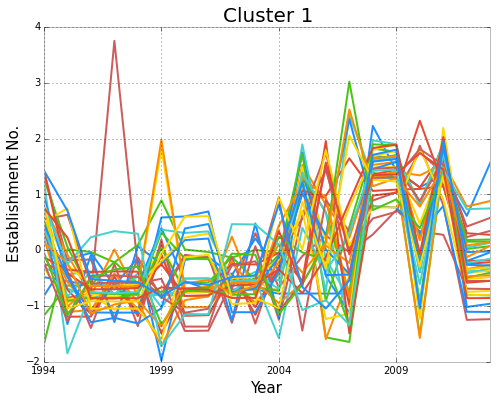

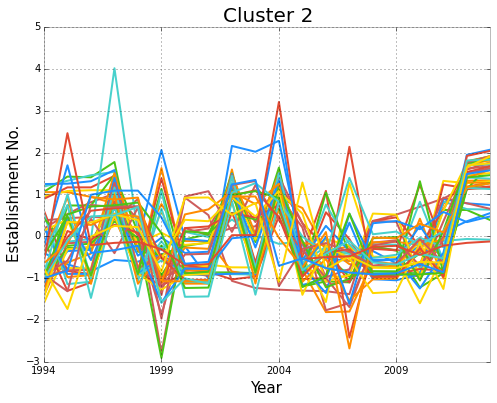

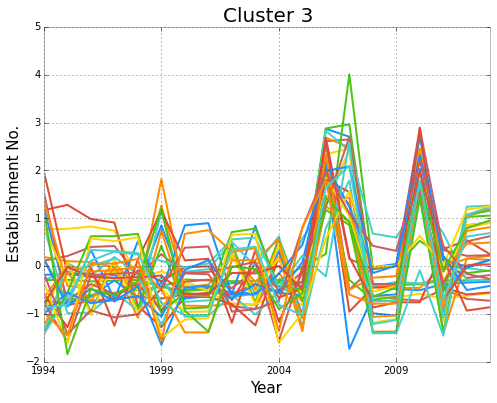

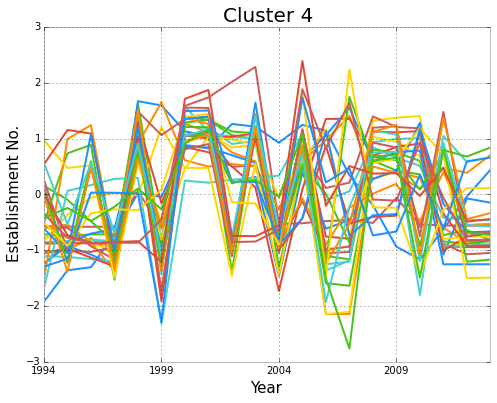

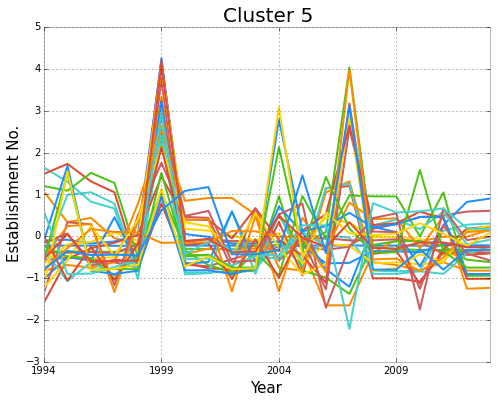

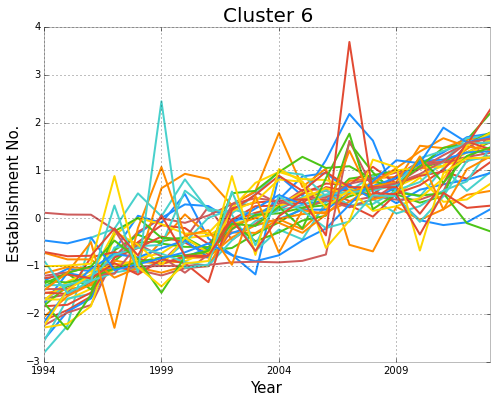

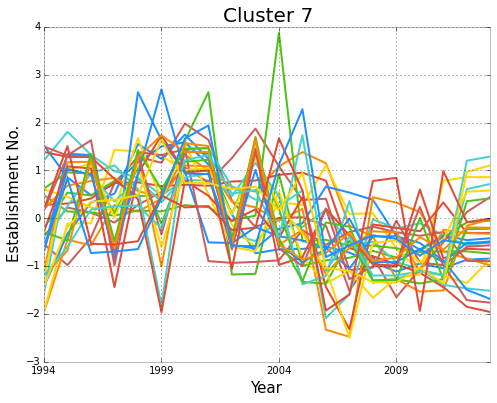

In [118]:
# visualize the clustering results
clusters = {}
for i in xrange(0, num_cluster):
    clusters[i] = data_n[(data_n['cluster'] == i)].T
# The legends are too long, so I got ride of them
    clusters[i].drop('cluster', axis = 0).plot(figsize=(8,6), legend=False)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Cluster %i'%(i+1), fontsize = 20)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Establishment No.', fontsize = 15)

## Prepare the table for the map (k-means clustering)

In [119]:
data_n['zip'] = data_n.index.astype(str)

In [120]:
geodata['zip'] = geodata.zip.astype(int).astype(str)

In [121]:
zipshp = pd.merge(data_n[['zip','cluster']], geodata[['zip', 'geometry']], on='zip')

In [122]:
zipshp = gpd.GeoDataFrame(zipshp)

In [123]:
# zipshp.plot(column = 'cluster', figsize = (16,12),
#             colormap = palettable.colorbrewer.qualitative.Accent_7.mpl_colormap)
# plt.title('K-means clustering for NYC, k = 7', fontsize = 20)
# plt.xlabel('Longitude', fontsize = 15)
# plt.ylabel('Latitude', fontsize = 15)

## I've run the clustering for different number of clusters. Seems 7 clusters can better capture the whole manhattan. All other boroughs are pretty messy.

## use DBSCAN as the second clustering method

In [124]:
np.random.seed(120)
db = DBSCAN(eps=2).fit(dataClean.T)

In [125]:
labels = (db.labels_).astype(int)

In [126]:
data_db = pd.DataFrame(data_n[['zip']], columns = ['zip'])
data_db['cluster'] = labels

In [127]:
zipshp_db = pd.merge(data_db[['zip','cluster']], geodata[['zip', 'geometry']], on='zip')

In [128]:
zipshp_db = gpd.GeoDataFrame(zipshp_db)

## use Agglomerative Clustering as the third clustering method

In [129]:
agg = AgglomerativeClustering(n_clusters=num_cluster, compute_full_tree=True).fit(dataClean.T)

In [130]:
data_agg = pd.DataFrame(data_n[['zip']], columns = ['zip'])
data_agg['cluster'] = agg.labels_

In [131]:
zipshp_agg = pd.merge(data_agg[['zip','cluster']], geodata[['zip', 'geometry']], on='zip')

In [132]:
zipshp_agg = gpd.GeoDataFrame(zipshp_agg)

## Map Comparison

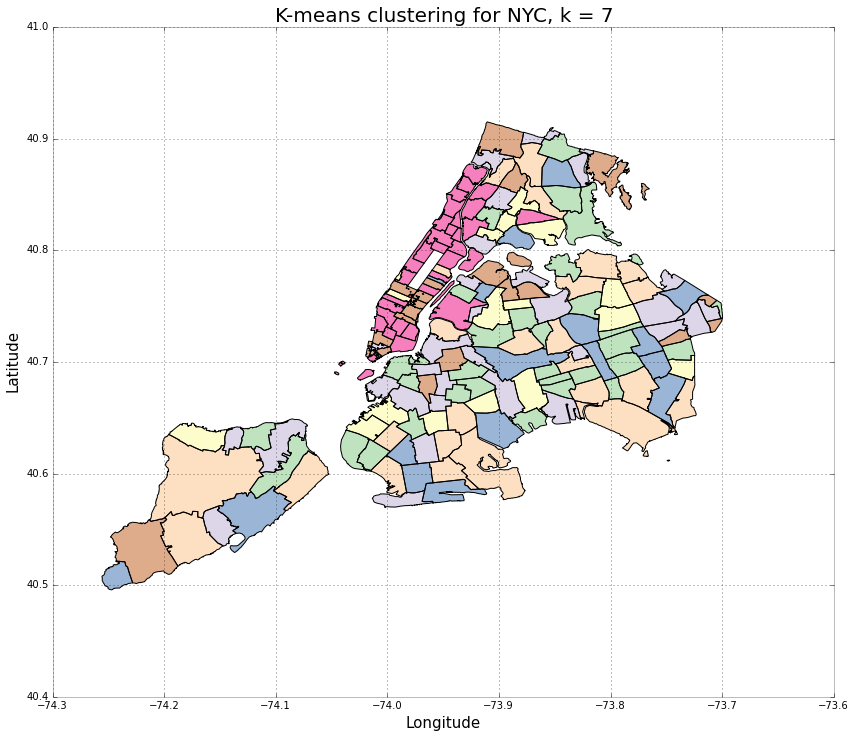

In [133]:
zipshp.plot(column = 'cluster', figsize = (16,12),
            colormap = palettable.colorbrewer.qualitative.Accent_7.mpl_colormap)
plt.title('K-means clustering for NYC, k = %i'%(num_cluster), fontsize = 20)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)

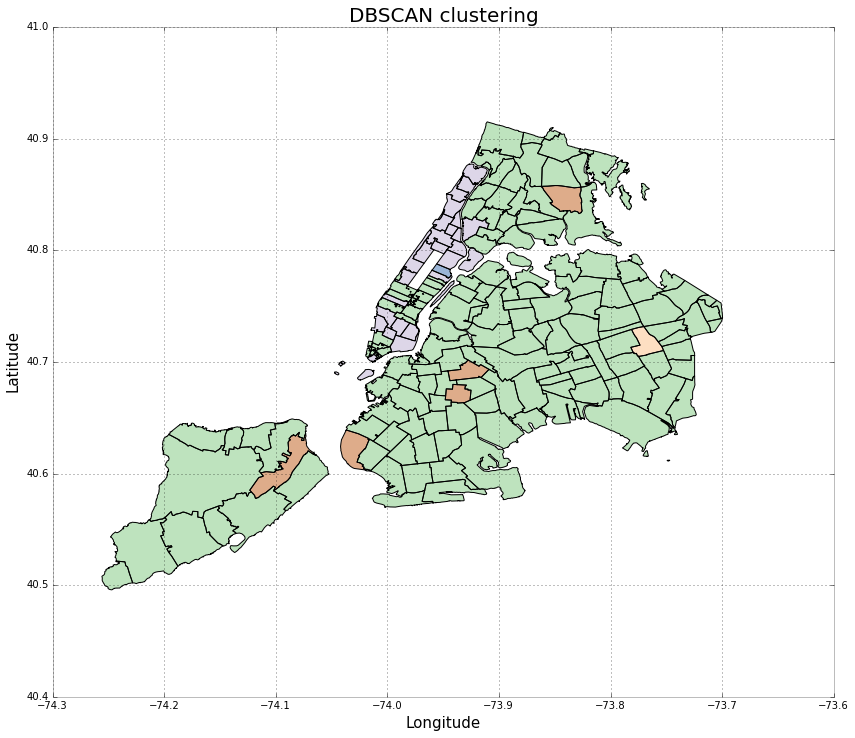

In [134]:
zipshp_db.plot(column = 'cluster', figsize = (16,12),
               colormap = palettable.colorbrewer.qualitative.Accent_7.mpl_colormap)
plt.title('DBSCAN clustering', fontsize = 20)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)

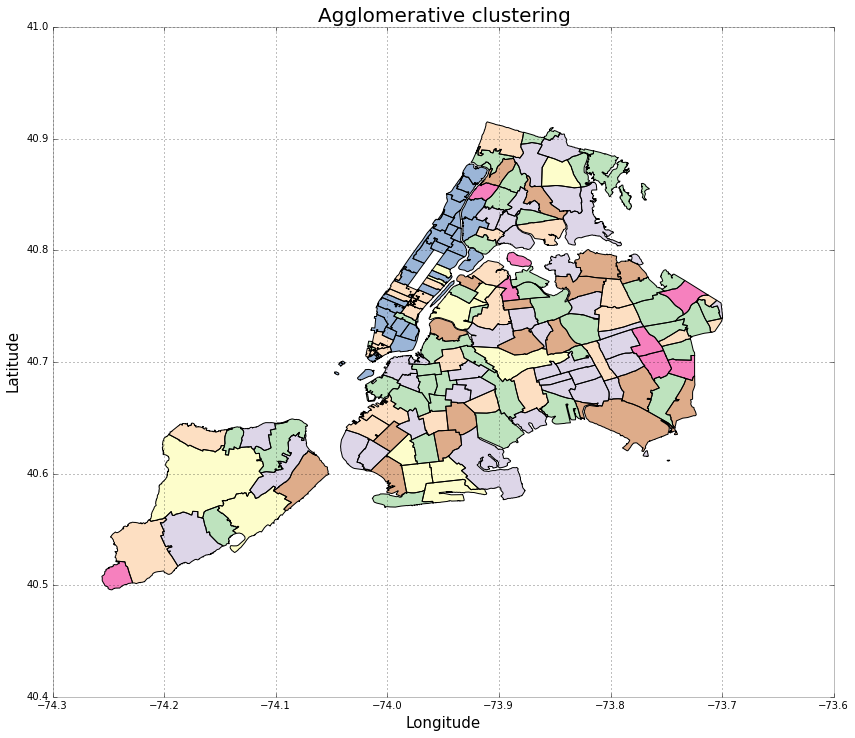

In [135]:
zipshp_agg.plot(column = 'cluster', figsize = (16,12),
               colormap = palettable.colorbrewer.qualitative.Accent_7.mpl_colormap)
plt.title('Agglomerative clustering', fontsize = 20)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)

## Discussion: according to all these three clustering methods, almost all the Manhattan area shows the same establishment growth pattern. In k-means clustering, Williamsburg shows a pattern similar to Manhattan. But in the other two clustering method, this is not reflected. All the other regions don't show a consistent growth pattern. 

##DBSCAN in general didn't show a very meanful result because it only identified Manhattan area. The K-means and Agglomerative clustering show more interesting results. I suppose the 